Ressources:

- https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85
- https://www.linkedin.com/advice/3/how-do-you-compare-evaluate-performance-different-1f
- https://stackoverflow.com/questions/33661762/python-statsmodels-arima-forecast

# ARIMA

[*********************100%%**********************]  1 of 1 completed

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Text(0.5, 1.0, 'GS Stock Prices')

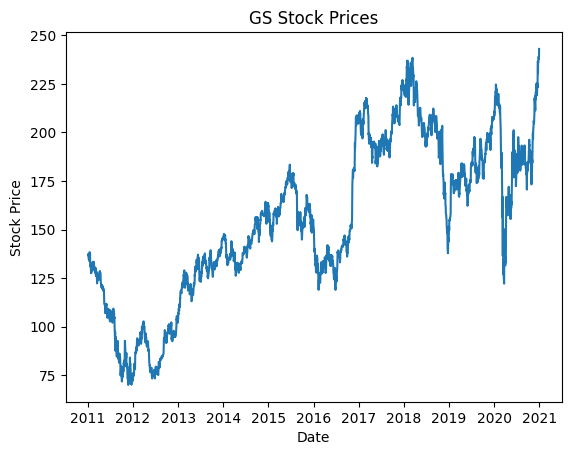

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
gs = yf.download("GS", start="2011-01-01", end="2021-01-01")
print(gs.keys())
# adjusted close: takes into account any corporate actions that might 
# affect the stock’s value, such as stock splits or dividend payments

plt.plot(gs['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("GS Stock Prices")

In [2]:
import pandas as pd

# Preprocess data
dataset_ex_df = gs.copy()
dataset_ex_df = dataset_ex_df.reset_index()
dataset_ex_df['Date'] = pd.to_datetime(dataset_ex_df['Date'])
dataset_ex_df.set_index('Date', inplace=True)
dataset_ex_df = dataset_ex_df['Close'].to_frame()

In [3]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(dataset_ex_df['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12944.119, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12965.532, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12950.184, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12952.296, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12963.855, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12942.196, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12941.178, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12941.872, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12943.669, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12943.203, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12939.507, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12950.671, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12940.534, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=12940.216, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0

- use rolling fit approacch

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets, we are predicting closing price
X = dataset_ex_df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

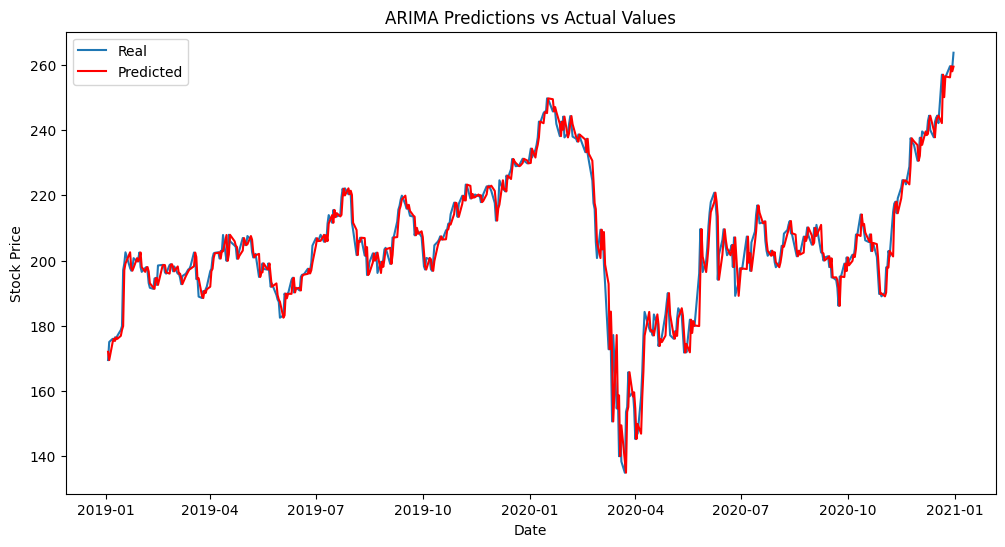

In [5]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Real')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Fourier Transform

                               fft
0     455947.220139-     0.000000j
1     -19886.093177+ 55127.034450j
2      -9622.264928+ 21109.444316j
3      24035.846682+  4825.698480j
4       5468.727670+ 19571.984642j
...                            ...
2512    4309.916066+  6740.599735j
2513    5468.727670- 19571.984642j
2514   24035.846682-  4825.698480j
2515   -9622.264928- 21109.444316j
2516  -19886.093177- 55127.034450j

[2517 rows x 1 columns]


C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


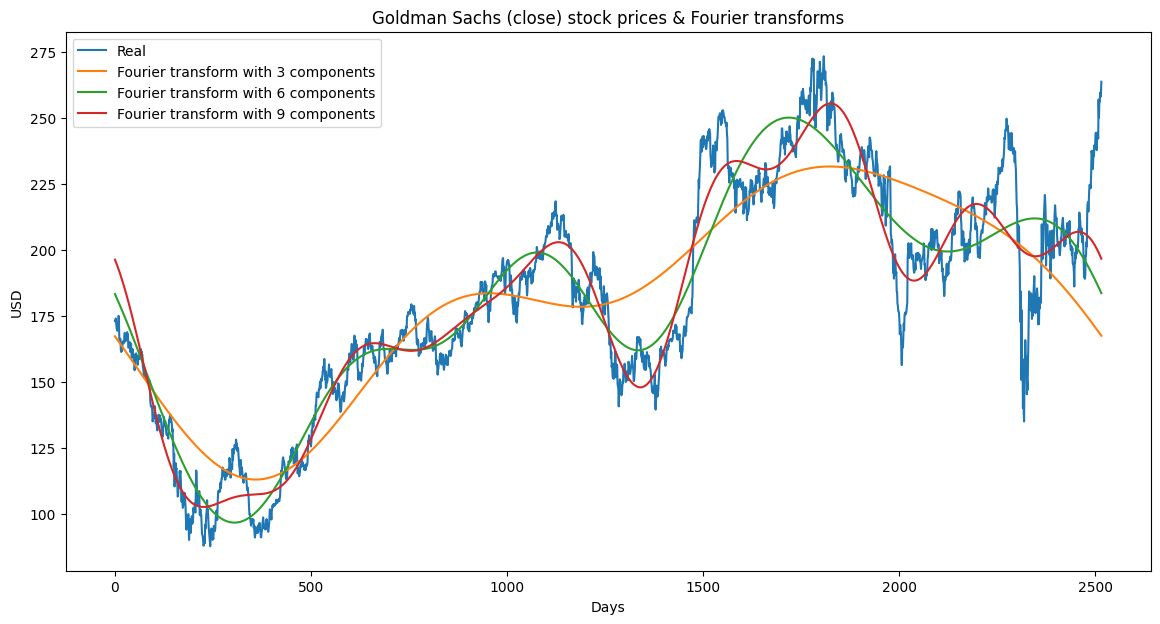

In [6]:
# Calculate the Fourier Transform
data_FT = dataset_ex_df[['Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
# fourier transform of price
print(fft_df)
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

# Plot the Fourier Transforms
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(np.asarray(data_FT['Close'].tolist()),  label='Real')
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

- three component Fourier tranfrom grasps overall direction while six and nine component transforms identify additional high-frequency components
- use technical indicators: SMA, EMA, RSI, MACD, OBV

In [7]:
# Calculate EMA
# EMA = EMA = (Closing Price x Smoothing Factor) + (Previous EMA x (1 – Smoothing Factor))
def ema(close, period=20):
    return close.ewm(span=period, adjust=False).mean()

# Calculate RSI
def rsi(close, period=14):
    delta = close.diff()
    gain, loss = delta.copy(), delta.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    avg_gain = gain.rolling(period).mean()
    avg_loss = abs(loss.rolling(period).mean())
    rs = avg_gain / avg_loss # higher if more avg gain than loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

# Calculate MACD
def macd(close, fast_period=12, slow_period=26, signal_period=9):
    fast_ema = close.ewm(span=fast_period, adjust=False).mean()
    slow_ema = close.ewm(span=slow_period, adjust=False).mean()
    macd_line = fast_ema - slow_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line

# Calculate OBV
def obv(close, volume):
    obv = np.where(close > close.shift(), volume, np.where(close < close.shift(), -volume, 0)).cumsum()
    return obv

### Combining features

In [8]:
# Add technical indicators to dataset DF
dataset_ex_df['ema_20'] = ema(gs["Close"], 20)
dataset_ex_df['ema_50'] = ema(gs["Close"], 50)
dataset_ex_df['ema_100'] = ema(gs["Close"], 100)

dataset_ex_df['rsi'] = rsi(gs["Close"])
dataset_ex_df['macd'] = macd(gs["Close"])
dataset_ex_df['obv'] = obv(gs["Close"], gs["Volume"])

# Create arima DF using predictions
arima_df = pd.DataFrame(history, index=dataset_ex_df.index, columns=['ARIMA'])

# Set Fourier Transforms DF
fft_df.reset_index(inplace=True)
fft_df['index'] = pd.to_datetime(dataset_ex_df.index)
fft_df.set_index('index', inplace=True)
fft_df_real = pd.DataFrame(np.real(fft_df['fft']), index=fft_df.index, columns=['Fourier_real'])
fft_df_imag = pd.DataFrame(np.imag(fft_df['fft']), index=fft_df.index, columns=['Fourier_imag'])

# Technical Indicators DF
technical_indicators_df = dataset_ex_df[['ema_20', 'ema_50', 'ema_100', 'rsi', 'macd', 'obv', 'Close']]

# Merge DF
merged_df = pd.concat([arima_df, fft_df_real, fft_df_imag, technical_indicators_df], axis=1)
merged_df = merged_df.dropna()
merged_df

,ARIMA,Fourier_real,Fourier_imag,ema_20,ema_50,ema_100,rsi,macd,obv,Close
2011-01-24,166.300003,-3821.974113,3629.434697,170.488136,171.808550,172.382968,34.192019,-1.460390,-19511600,166.300003
2011-01-25,161.979996,-2482.978467,2354.310706,169.677837,171.423117,172.176968,28.354109,-1.950223,-30771400,161.979996
2011-01-26,161.309998,-12.302092,279.375446,168.880900,171.026524,171.961781,25.009826,-2.365217,-37509400,161.309998
2011-01-27,164.029999,2514.524557,-4614.202908,168.418909,170.752150,171.804716,34.460467,-2.446421,-31473400,164.029999
2011-01-28,161.770004,5342.944208,1521.066795,167.785680,170.399909,171.606009,33.518101,-2.662448,-36043400,161.770004
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,256.160004,4309.916066,6740.599735,242.347214,228.830076,218.375487,66.248521,8.408628,69280700,256.160004
2020-12-28,259.589996,5468.727670,-19571.984642,243.989384,230.036347,219.191615,69.823697,8.762087,72074100,259.589996
2020-12-29,258.010010,24035.846682,-4825.698480,245.324681,231.133354,219.960296,67.583939,8.813122,70643200,258.010010
2020-12-30,259.450012,-9622.264928,-21109.444316,246.669951,232.243811,220.742271,65.999619,8.867544,72209700,259.450012


In [9]:
# Separate in Train and Test Dfs
train_size = int(len(merged_df) * 0.8)
train_df, test_df = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

Performing MinMax Scaler to standardize the feature values, ensuring that they have similar scales and distributions. This can prevent certain features from dominating the model’s learning process and causing inaccurate predictions. MinMax Scaler is especially important when using neural networks, as these models are sensitive to the scale and distribution of the input data. By using scaler, the model can be trained more efficiently and produce more accurate results.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df.drop('Close', axis=1))
test_scaled = scaler.transform(test_df.drop('Close', axis=1))

# Convert the scaled data back to a DataFrame
train_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns[:-1], index=train_df.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns[:-1], index=test_df.index)

# Merge the scaled features with the target variable
train_scaled_df['Close'] = train_df['Close']
test_scaled_df['Close'] = test_df['Close']

# Split the scaled data into Features and Label
X_train = train_scaled_df.iloc[:, :-1].values
y_train = train_scaled_df.iloc[:, -1].values
X_test = test_scaled_df.iloc[:, :-1].values
y_test = test_scaled_df.iloc[:, -1].values

### Training a Deep Learning Model for Prediction:
Using MSE (Mean Sq. Error) as the model loss function. Incorporating early stoppage criteria which enables the training process to stop when the validation loss does not show any significant reduction. This ensures that the model does not overfit and reduces the computational resources required for training. Moreover, we have set the shuffle parameter to False in order to maintain the order of the data samples, which is crucial in time series analysis.

In [11]:
# Import keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define model
# https://keras.io/api/models/model/
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')


# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')

# Train the model with early stopping callback
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop], shuffle=False)

Epoch 1/1000


C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22542.9746 - val_loss: 40771.6992
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 21195.3438 - val_loss: 35255.7109
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 17116.0996 - val_loss: 23512.4414
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 9921.1660 - val_loss: 9436.4658
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 2943.2166 - val_loss: 1646.3317
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 247.9843 - val_loss: 278.4503
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 64.0933 - val_loss: 205.0941
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 83.5261 - val_loss: 199.1937
Epoch 9/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 81.3087 - val_loss: 195.8674
Epoch 10/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 76.7611 - val_loss: 192.6982
Epoch 11/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 72.1659 - val_loss:

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597 (10.15 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,732 (6.77 KB)

# Evaluating the model

Evaluation metrics are essential in deep learning to assess the performance of the model and determine whether it is accurately predicting the target variable. Several evaluation metrics are commonly used in deep learning, including mean squared error (MSE), mean absolute error (MAE), R-squared (R2), explained variance, mean absolute percentage error (MAPE), and mean percentage error (MPE).

MSE measures the average squared difference between the predicted and actual values, giving higher weight to large errors. MAE, on the other hand, measures the average absolute difference between the predicted and actual values, giving equal weight to all errors.

R2 measures the proportion of the variance in the target variable that is explained by the model, while explained variance measures the variance in the target variable that is explained by the model relative to the total variance.

MAPE and MPE are percentage-based metrics that measure the average percentage difference between the predicted and actual values. MAPE is more suitable for smaller errors, while MPE is more appropriate for larger errors.

Choosing the appropriate evaluation metric depends on the specific problem and the desired outcome. For example, MSE and MAE are commonly used in regression problems, while classification problems may use metrics such as accuracy and F1 score. We will be using the regression evaluation metrics, as shown below.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

import numpy as np
y_pred = model.predict(X_test)

# Calculate test metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 7.773496040348484
Mean Absolute Error (MAE): 1.5107479133529815
R2 Score: 0.9811651788638072
Explained Variance Score: 0.9814304211647593
Mean Absolute Percentage Error (MAPE): 10.668923259708981
Mean Percentage Error (MPE): -0.8646923912871852


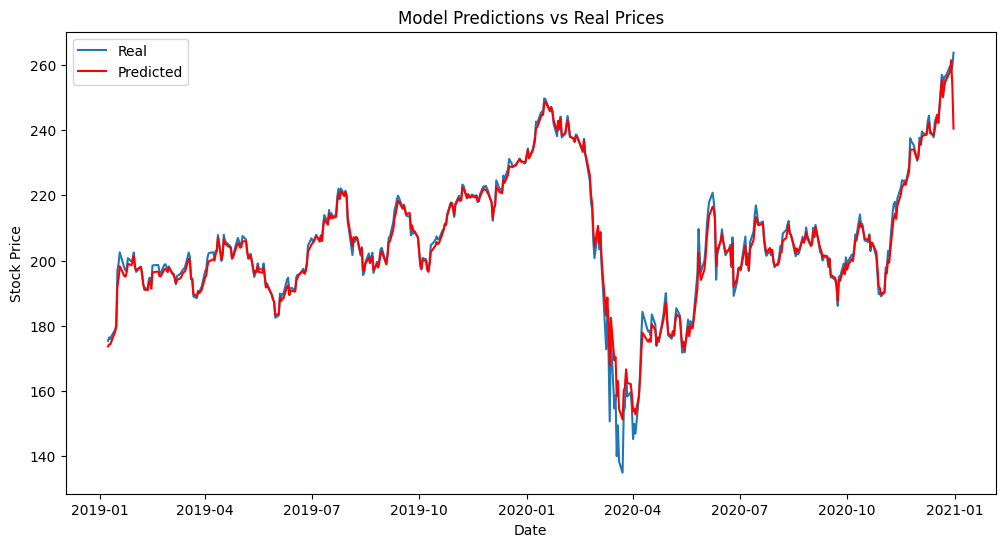

In [13]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_scaled_df.index, y_test, label='Real')
plt.plot(test_scaled_df.index, y_pred, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()